# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Exercise

## Train an agent

In [7]:
from collections import deque
import torch

In [8]:
def dqn(agent,
        n_episodes=3000,
        max_time_step=1000,
        eps_start=1.0,
        eps_end=0.01,
        eps_decay=0.996,
        is_train=True,
        thresh_hold=13.0):

    # score list for plot
    scores = []
    average_denominator = 100
    # the recent 100 scores for calculate the average score
    recent_scores = deque(maxlen=average_denominator)
    eps = eps_start

    for i_episode in range(1, n_episodes + 1):
        # load the enviornment
        env_info = env.reset(train_mode=is_train)[brain_name]
        # initialize state and score
        state = env_info.vector_observations[0]
        score = 0

        # roll over
        for t in range(max_time_step):
            # choose action
            if is_train:
                action = agent.act(state, eps)
            else:
                action = agent.act(state, 0.0)
            # update envirinment by the action
            env_info = env.step(action)[brain_name]
            # update next_state
            next_state = env_info.vector_observations[0]
            # update reward
            reward = env_info.rewards[0]
            # check the episode is fininshed
            done = env_info.local_done[0]
            # make the agent step
            if is_train:
                agent.step(state, action, reward, next_state, done)
            # update score
            score += reward
            # update current state as next_state
            state = next_state
            # break if episode is finished
            if done:
                break

        # append recent score
        recent_scores.append(score)
        average_score = np.mean(scores)
        # append recent score
        scores.append(score)
        # update epsilon
        eps = max(eps_end, eps_decay * eps)

        # print
        print(
            "\r> i_episode: {:4d}\taverage_score: {:.3f}".format(
                i_episode, average_score),
            end="")
        if i_episode % average_denominator == 0:
            print("\r> i_episode: {:4d}\taverage_score: {:.3f}".format(
                i_episode, average_score))

        if average_score > thresh_hold:
            print("\n= completed in i_episode: {:4d}\taverage_score: {:.3f}".
                  format(i_episode, average_score))

            torch.save(agent.qnetwork_local.state_dict(),
                       'checkpoint_agent.pth')
            break
    return scores

## Train the agent

In [9]:
from dqn_agent import Agent

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

/root/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/root/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


> i_episode:  100	average_score: 1.1211
> i_episode:  200	average_score: 2.347
> i_episode:  300	average_score: 3.843
> i_episode:  400	average_score: 5.090
> i_episode:  500	average_score: 6.349
> i_episode:  600	average_score: 7.362
> i_episode:  700	average_score: 8.187
> i_episode:  800	average_score: 8.882
> i_episode:  900	average_score: 9.396
> i_episode: 1000	average_score: 9.764
> i_episode: 1100	average_score: 10.083
> i_episode: 1200	average_score: 10.415
> i_episode: 1300	average_score: 10.667
> i_episode: 1400	average_score: 10.999
> i_episode: 1500	average_score: 11.197
> i_episode: 1600	average_score: 11.411
> i_episode: 1700	average_score: 11.635
> i_episode: 1800	average_score: 11.812
> i_episode: 1900	average_score: 11.967
> i_episode: 2000	average_score: 12.104
> i_episode: 2100	average_score: 12.288
> i_episode: 2200	average_score: 12.388
> i_episode: 2300	average_score: 12.464
> i_episode: 2400	average_score: 12.548
> i_episode: 2500	average_score: 12.634
> i_episo

In [11]:
env.close()

## Plot the result

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

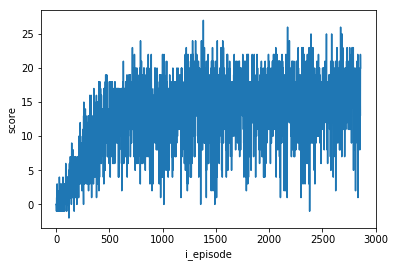

In [13]:
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('i_episode')
plt.show()